# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | chebba
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | george town
Processing Record 6 of Set 1 | timmins
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | fortaleza
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | saudarkrokur
Processing Record 13 of Set 1 | puerto ayacucho
Processing Record 14 of Set 1 | lukolela
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | vohipaho
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | chebarkul'
Processing Record 21 of Set 1 | colonia
Processing Record 22 

Processing Record 40 of Set 4 | yutan
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | pachino
Processing Record 43 of Set 4 | opuwo
Processing Record 44 of Set 4 | keminmaa
Processing Record 45 of Set 4 | hadibu
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | hawaiian paradise park
Processing Record 48 of Set 4 | tyrnyauz
Processing Record 49 of Set 4 | st. john's
Processing Record 0 of Set 5 | al kharijah
Processing Record 1 of Set 5 | sultanah
Processing Record 2 of Set 5 | bredasdorp
Processing Record 3 of Set 5 | ketchikan
Processing Record 4 of Set 5 | mumbwa
Processing Record 5 of Set 5 | taoudenni
Processing Record 6 of Set 5 | ta`u
Processing Record 7 of Set 5 | mimizan
Processing Record 8 of Set 5 | aberdeen
Processing Record 9 of Set 5 | smithers
Processing Record 10 of Set 5 | larose
Processing Record 11 of Set 5 | vigan
Processing Record 12 of Set 5 | avarua
Processing Record 13 of Set 5 | zavoronezhskoye
Processin

Processing Record 34 of Set 8 | fredericksburg
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | fort bragg
Processing Record 37 of Set 8 | zambezi
Processing Record 38 of Set 8 | wad rawah
Processing Record 39 of Set 8 | linqiong
Processing Record 40 of Set 8 | ghat
Processing Record 41 of Set 8 | burang
Processing Record 42 of Set 8 | huaquillas
Processing Record 43 of Set 8 | torrejon de ardoz
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | al mawsil al jadidah
Processing Record 46 of Set 8 | san ignacio
Processing Record 47 of Set 8 | al jawf
Processing Record 48 of Set 8 | khandyga
Processing Record 49 of Set 8 | howrah
Processing Record 0 of Set 9 | itoman
Processing Record 1 of Set 9 | padam
City not found. Skipping...
Processing Record 2 of Set 9 | zapala
Processing Record 3 of Set 9 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 9 | tranqueras
Processing Record 5 of Set 9 | maardu
Processing Record 6 of S

Processing Record 26 of Set 12 | maralal
Processing Record 27 of Set 12 | cimitarra
Processing Record 28 of Set 12 | obama
Processing Record 29 of Set 12 | maysville
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | ukhta
Processing Record 32 of Set 12 | rio preto da eva
Processing Record 33 of Set 12 | tazacorte
Processing Record 34 of Set 12 | pointe-noire
Processing Record 35 of Set 12 | san mariano
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | kodiak
Processing Record 38 of Set 12 | pavlodar
Processing Record 39 of Set 12 | mbabane
Processing Record 40 of Set 12 | melekeok village
Processing Record 41 of Set 12 | ambovombe
Processing Record 42 of Set 12 | klaksvik
Processing Record 43 of Set 12 | yaguaron
Processing Record 44 of Set 12 | roosevelt
Processing Record 45 of Set 12 | twon-brass
Processing Record 46 of Set 12 | meadow lake
Processing Record 47 of Set 12 | andalusia
Processing Record 48 of Set 12 | dhuusamarreeb
Pro

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,21.60,58,56,5.12,AU,1699842054
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699842059
2,chebba,35.2372,11.1150,18.84,76,9,6.33,TN,1699842182
3,petropavlovsk-kamchatsky,53.0452,158.6483,-0.67,74,40,12.52,RU,1699842067
4,george town,5.4112,100.3354,31.64,75,20,1.54,MY,1699842044


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,21.60,58,56,5.12,AU,1699842054
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699842059
2,chebba,35.2372,11.1150,18.84,76,9,6.33,TN,1699842182
3,petropavlovsk-kamchatsky,53.0452,158.6483,-0.67,74,40,12.52,RU,1699842067
4,george town,5.4112,100.3354,31.64,75,20,1.54,MY,1699842044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

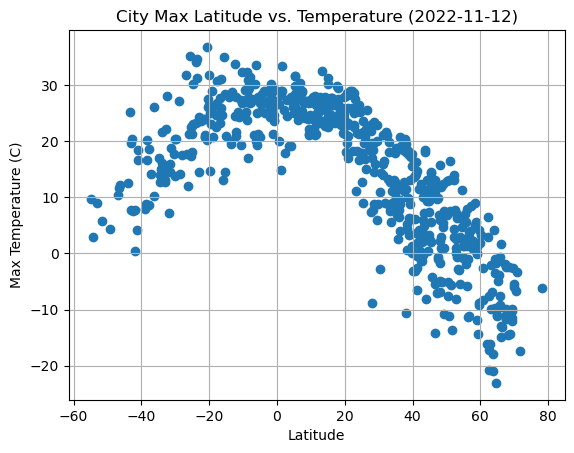

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-11-12)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

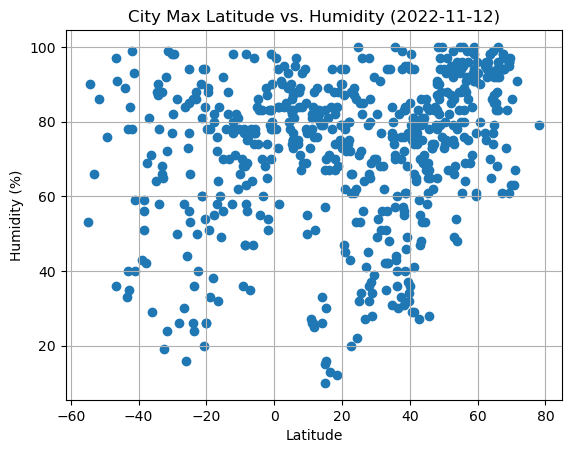

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-11-12)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

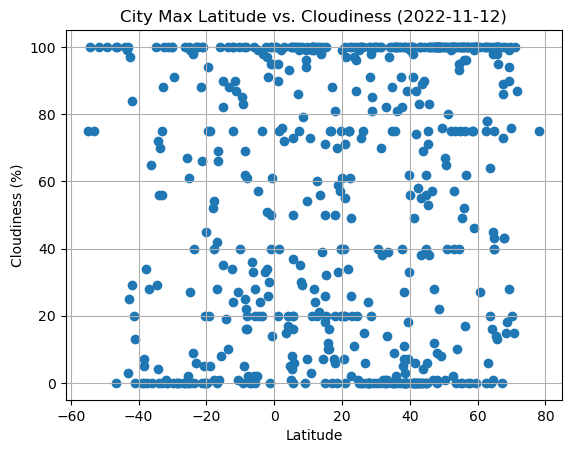

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-11-12)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

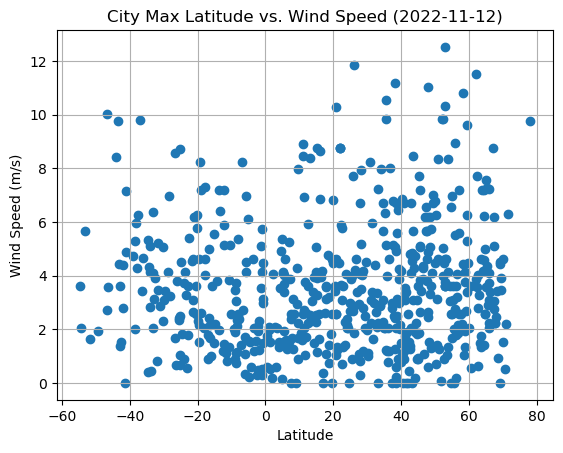

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-11-12)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    return slope, intercept, rvalue, pvalue, stderr

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chebba,35.2372,11.1150,18.84,76,9,6.33,TN,1699842182
3,petropavlovsk-kamchatsky,53.0452,158.6483,-0.67,74,40,12.52,RU,1699842067
4,george town,5.4112,100.3354,31.64,75,20,1.54,MY,1699842044
5,timmins,48.4669,-81.3331,0.90,86,100,6.17,CA,1699842027
7,kutum,14.2000,24.6667,22.71,33,39,3.39,SD,1699842182


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,21.60,58,56,5.12,AU,1699842054
1,carnarvon,-24.8667,113.6333,23.19,66,27,4.52,AU,1699842059
6,port-aux-francais,-49.3500,70.2167,4.34,76,100,1.92,TF,1699841676
8,natal,-5.7950,-35.2094,25.12,78,20,4.12,BR,1699841695
9,fortaleza,-3.7227,-38.5247,28.93,70,20,4.63,BR,1699842071


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7604578125703205


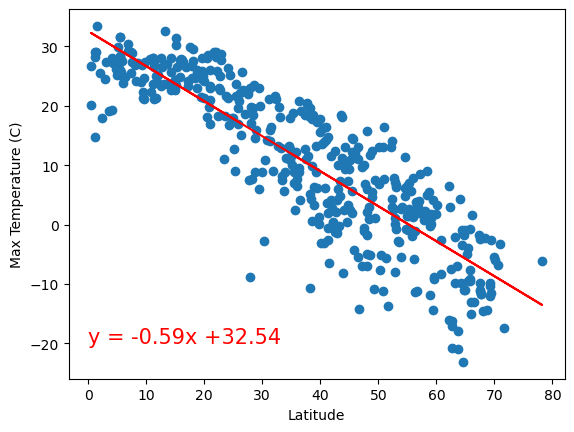

In [61]:
# Linear regression on Northern Hemisphere
reg = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value is: {reg[2]**2}")

regress_values = northern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.show()

The r-value is: 0.481045864772641


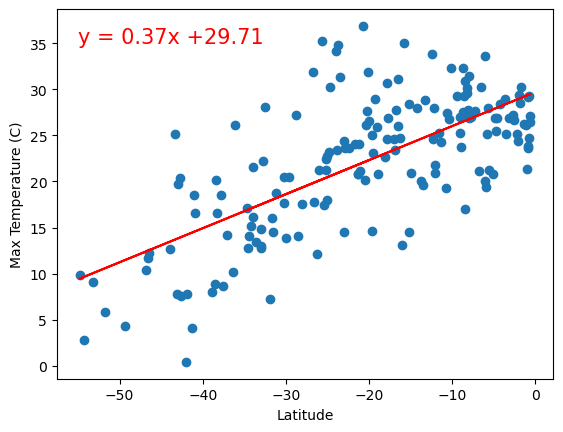

In [62]:
# Linear regression on Southern Hemisphere
reg = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value is: {reg[2]**2}")

regress_values = southern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** The linear regression is modeling the relationship between latitudes and max temperatures. As latitudes near 0, which is near the equator, the max temperatures reach their highest points. They tend to then decrease the further away from 0. There is a strong correlation between temperature and northern hemisphere latitudes, while there is only a weak correlation with southern hemisphere latitudes and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05534398830128749


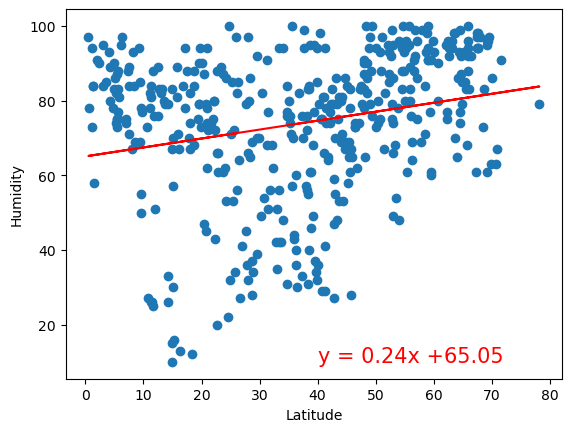

In [63]:
# Northern Hemisphere
reg = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f"The r-value is: {reg[2]**2}")

regress_values = northern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.show()

The r-value is: 0.010703265171884267


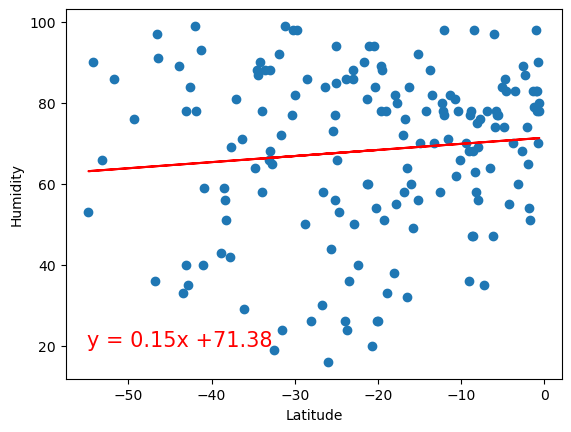

In [65]:
# Southern Hemisphere
reg = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f"The r-value is: {reg[2]**2}")

regress_values = southern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** This linear regression is modeling the relationship between humidity and latitude. From these graphs, there is not a strong relationship between humidity and latitudes. For both southern and northern hemispheres, the humidity seems to increase with latitude, but this is a non existant correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017646735267170057


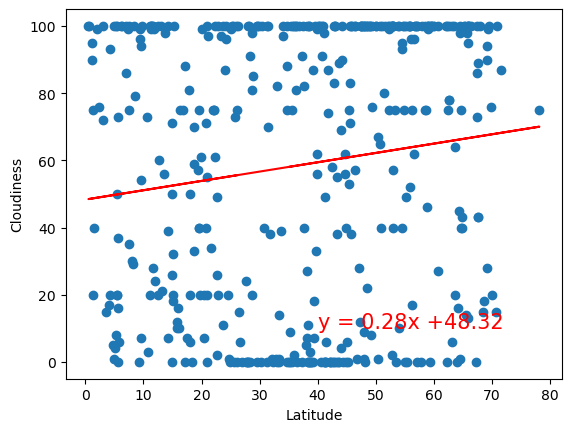

In [66]:
# Northern Hemisphere
reg = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"The r-value is: {reg[2]**2}")

regress_values = northern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.show()

The r-value is: 0.00033319359334801755


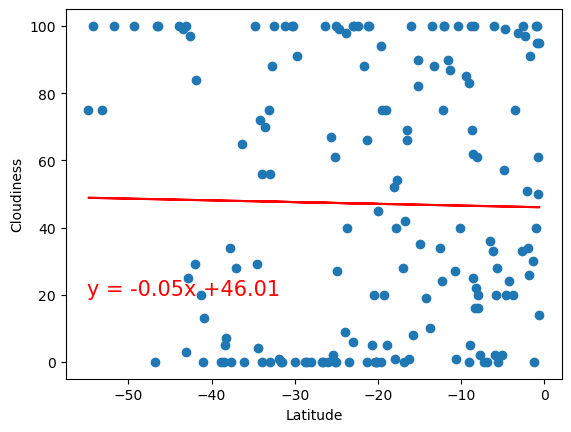

In [67]:
# Southern Hemisphere
reg = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"The r-value is: {reg[2]**2}")

regress_values = southern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** These graphs represent the correlation between cloudiness and latitudes. There is no real correlation between the two. The data shows that cloudiness is very random for both northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02489230457279185


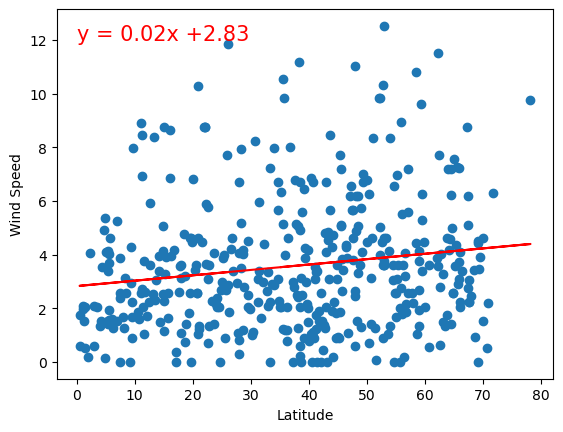

In [68]:
# Northern Hemisphere
reg = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f"The r-value is: {reg[2]**2}")

regress_values = northern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

plt.show()

The r-value is: 0.06167611710800318


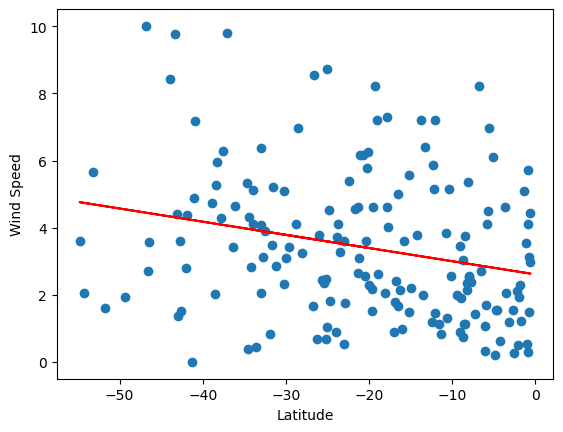

In [69]:
# Southern Hemisphere
reg = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"The r-value is: {reg[2]**2}")

regress_values = southern_hemi_df['Lat'] * reg[0] + reg[1]
line_eq = "y = " + str(round(reg[0],2)) + "x +" + str(round(reg[1],2))

# Set up the graph
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** These graphs aim to show the relationship between latitude and wind speeds. There is no correlation between the two. When doing the linear regressions, the r values were too low to distinguish any correlations. 